In [127]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
import math
import yfinance as yf
import requests as rq
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [129]:
aapl = yf.Ticker("AAPL")

# get stock info
aapl.info

# get historical market data
hist = aapl.history(period="48mo")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-07-09,45.545465,45.829071,45.497397,45.805038,79026400,0.0,0.0
2018-07-10,45.836288,45.973283,45.708902,45.749763,63756400,0.0,0.0
2018-07-11,45.305126,45.612768,45.091218,45.156113,75326000,0.0,0.0
2018-07-12,45.552678,46.004529,45.499802,45.913197,72164400,0.0,0.0
2018-07-13,45.925212,46.107873,45.881948,45.985298,50055600,0.0,0.0
...,...,...,...,...,...,...,...
2022-07-01,136.039993,139.039993,135.660004,138.929993,71007500,0.0,0.0
2022-07-05,137.770004,141.610001,136.929993,141.559998,73353800,0.0,0.0
2022-07-06,141.350006,144.119995,141.080002,142.919998,74064300,0.0,0.0


In [130]:
#Get the shape of the rows and columns in the dataset
hist.shape

(1008, 7)

In [131]:
hist.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

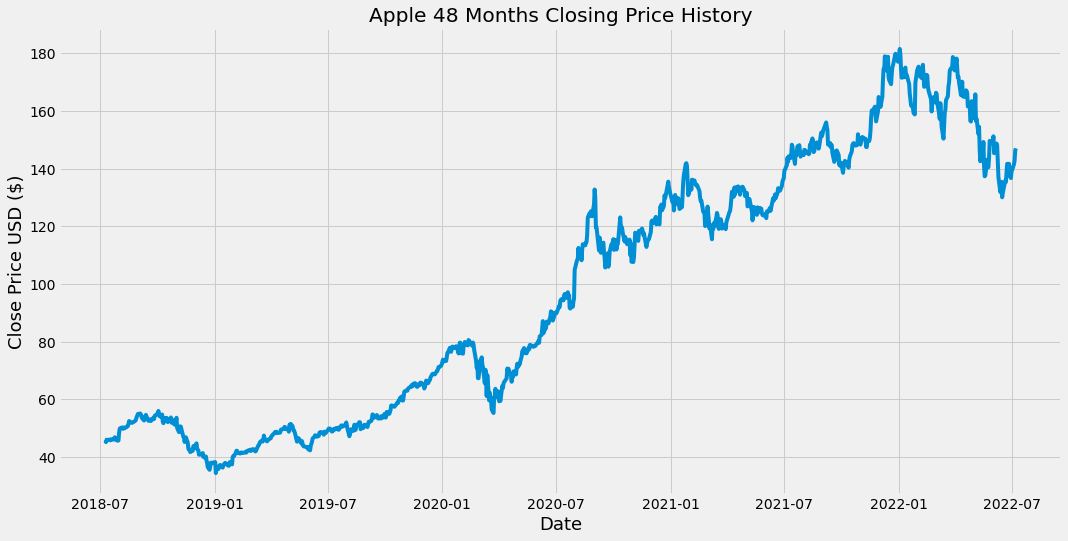

In [132]:
#Visulaize
plt.figure(figsize=(16,8))
plt.title('Apple 48 Months Closing Price History')
plt.plot(hist['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [133]:
#Create a new dataframe with only the 'Close' column
data =  hist.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_dataset_len = math.ceil(len(dataset) * .8)

training_dataset_len

807

In [134]:
#Scale the data (Good practice prior to passing to neuro network)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0774371 ],
       [0.07706132],
       [0.07302556],
       ...,
       [0.73764534],
       [0.76096327],
       [0.76565395]])

In [135]:
scaled_data.shape

(1008, 1)

In [136]:
#Create the training data set
#Create the scaled training data set
# Creating a data structure with 60 timesteps and 1 output
train_data = scaled_data[0:training_dataset_len, :]
#Split the data
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.0774371 , 0.07706132, 0.07302556, 0.07817238, 0.07866254,
       0.07797635, 0.07885859, 0.07714296, 0.07956117, 0.07884231,
       0.07912005, 0.0813912 , 0.08436492, 0.08336824, 0.07809066,
       0.07634238, 0.07696322, 0.0952795 , 0.10490326, 0.10588366,
       0.10764828, 0.10444577, 0.10467453, 0.10733786, 0.10632128,
       0.10851839, 0.10996131, 0.11076469, 0.11581483, 0.12279974,
       0.11932374, 0.11863501, 0.1186515 , 0.11937291, 0.12047143,
       0.12339   , 0.12627579, 0.13165385, 0.13501515, 0.13927824,
       0.14047519, 0.1380321 , 0.13185063, 0.12889923, 0.12402943,
       0.1330803 , 0.12852214, 0.13727784, 0.13306394, 0.12329166,
       0.1238819 , 0.1240951 , 0.12681691, 0.12293088, 0.12806305,
       0.13035852, 0.12745634, 0.13488398, 0.13617934, 0.13867154])]
[0.1419836373378732]



In [137]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [138]:
#Reshape the data
#No of Samples, No of time steps (columns) and the no. of features (closing price)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(747, 60, 1)

In [139]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1))) #50 neurons
model.add(LSTM(50, return_sequences=False ))
model.add(Dense(25))
model.add(Dense(1))

In [140]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') #optimzer is used to improve upon loss fucntion

In [141]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

747/747 [==============================] - 42s 46ms/step - loss: 0.0035


In [142]:
#Creating the testing dataset
#Create a new array containing scaled values from 1552 to 2005
test_data = scaled_data[training_dataset_len - 60: , :] #scaled data minus 60 to the end of the dataset and all columns
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_dataset_len:, :] #the values for the models to predict, the 61st values that is unscaled
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0]) #x_test contains the past 60 values

In [143]:
#Convert  the test data to a numpy array for use in the LSTM model
x_test = np.array(x_test)

In [144]:
x_test.shape

(201, 60)

In [145]:
#Reshape the test data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) #no of rows (samples), no of time steps (columns), no of features (close price)

In [146]:
x_test.shape

(201, 60, 1)

In [147]:
#Get the models predicted price (y-test)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #get predicted y-test base of off x_test

In [148]:
#Get the root mean squared error (RMSE)
#Its just one of several ways to test model
# The smaller it is, the better, 0 means exactly 
rmse = np.sqrt(np.mean( predictions - y_test )**2 )
rmse

6.459181524627837

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


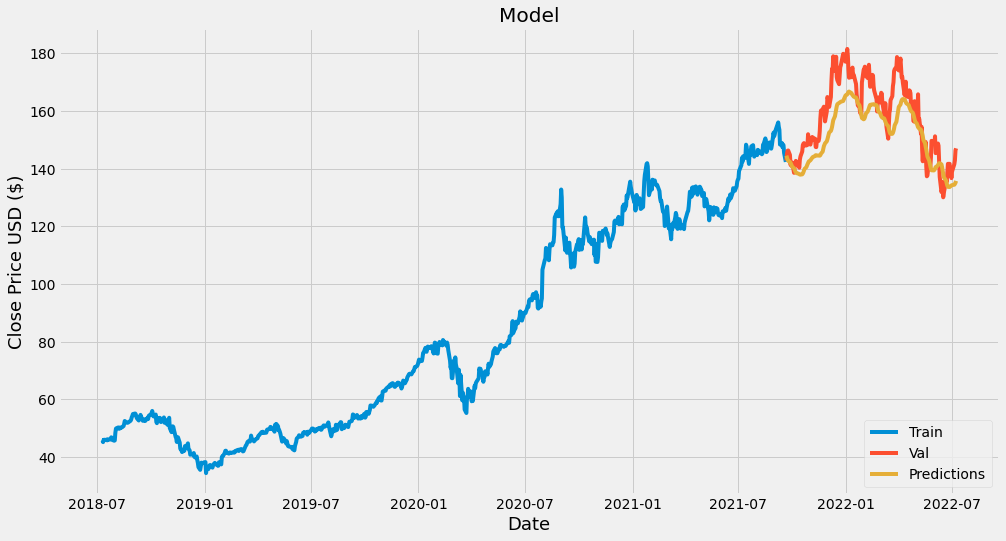

In [149]:
#Plot the data
train = data[:training_dataset_len] #from 0 to training_dataset_len
valid = data[training_dataset_len:] #to the end of the dataset
valid['Predictions'] = predictions

#Visualise the data
plt.figure(figsize=(15,8))
plt.title("Model")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show();


The blue is the dat the model was training on
The Red is the Actual values for rest of the days in the dataset
The Orange is the predicted values 

In [150]:
#Show the valid and the predicted prices
valid

,Close,Predictions
Date,,
2021-09-21,142.828873,144.507828
2021-09-22,145.238739,143.784805
2021-09-23,146.214630,143.170273
2021-09-24,146.304245,142.698364
2021-09-27,144.760757,142.347321
...,...,...
2022-07-01,138.929993,134.283081
2022-07-05,141.559998,134.423294
2022-07-06,142.919998,134.699707
